## Design of Experiments (DOE) Package
This github repo hosts a simple code for designing experiments, building models, and seeing basic statistical information. The package is aimed to be used to direct experimental or computational work when it comes to exploring multidimensional spaces (ex. formulation chemistries). You may want to install the library with the following:

In [ ]:
!pip install git+https://github.com/mayabhat/doe_v2 

Once installed, you can import the doe module as follows:

In [3]:
from doe import doe

## Creating Design Files 
You can create xlsx files that contain the necessary experiments by creating a design object and specifying the experiment's desired directory, the independent variables, and the expected output variables.

In [4]:
design = doe.doe('test-dir', ['CompA', 'CompB'], ['Target1'])
design

,CompA,CompB,Target1


There should now be a directory called test-dir if there was not already. To make the design, you will need to call the method make_design() as follows. make_design() takes in a design array and a range. 

The design array can be manually generated or generated using the pyDOE2 functionalities expressed in this package. Designs can be of the form  doe.bbdesign(), doe.ccdesign(), doe.fullfact, or more. See documentation to figure out how to make a design https://pythonhosted.org/pyDOE/. 

pyDOE2 outputs designs from -1 to 1. Range takes center points and distance from center points to convert -1 to 1 to scaled values. The form is [[center point, deviation], [center point, deviation]] where the length of the list is the equivalent to the number of independent variables.

make_design() outputs an xlsx file with the experiments that must be completed. Target values should be inputed as the experiments are completed in the target column. 

In [5]:
d = doe.ccdesign(2, face = 'cci')
range = [[3, 1.5], [10, 8]]
design.make_design(d, range)
design

,CompA,CompB,Target1
0,1.93934,4.343146,
1,4.06066,4.343146,
2,1.93934,15.656854,
3,4.06066,15.656854,
4,3.00000,10.000000,
5,3.00000,10.000000,
6,3.00000,10.000000,
7,3.00000,10.000000,
8,1.50000,10.000000,
9,4.50000,10.000000,


## Building a Model with Results

To build a model with the obtained results, you will need to call the method fit(). Fit takes in a path to a results xlsx file. This file should be of the same format as the design xlsx with independent and dependent variable names as column headings. 

fit() should output a stdout report containing information about the linear model's parameters, p values, r^2, residual plots, and more. 

,CompA,CompB,Target1
0,1.93934,4.343146,1
1,4.06066,4.343146,2
2,1.93934,15.656854,3
3,4.06066,15.656854,1
4,3.00000,10.000000,2
5,3.00000,10.000000,3
6,3.00000,10.000000,1
7,3.00000,10.000000,2
8,1.50000,10.000000,4
9,4.50000,10.000000,5


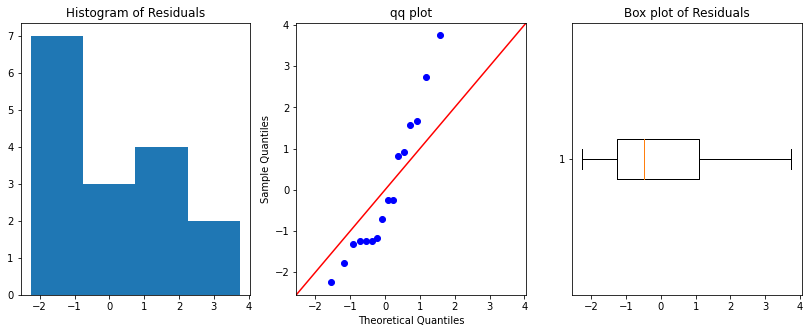

In [7]:
design.fit('results.xlsx')
design

## Other Functionalities
You can make a parity plot to see how the model's predicted vs experimental values are. If the model is good, these values should fall on a 45 degree x = y line. 

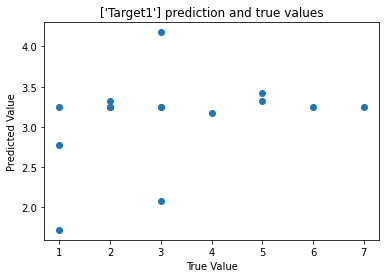

In [8]:
design.parity()

You can get an optimum prediction by either specifying maximize or minimize with the optimum() function. If you want to maximize the target, indicate maximize = True, if you want to minimize, indicate maximize = False. 

In [9]:
design.optimum(maximize = True)

{'Compositions': array([ 1.5, 18. ]), "['Target1']": 4.853553390593341}

Residual plots can be displayed with residual_plots(). There are a few ways to tell if your model is not good enough. Theoretically, the histogram of your residuals should be normally distributed, and the data points on the qq plot should fall on the 45 degree angle line. If this is not the case, the model may need to be revisted. 

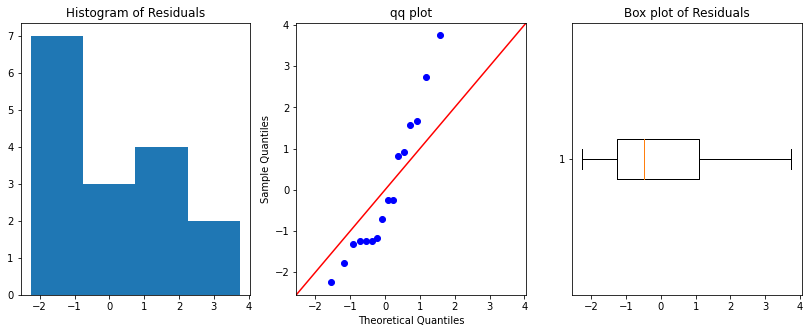

In [11]:
design.residual_plots()


P values indicate which of the components in the model contribute the greatest to the variance in target values. P values under 0.05 are most significant, and those above 0.05 are not. If none are under 0.05, the next lowest can be considered statistically significant. 

In [12]:
print(design.p_values())

CompB has the most significant P value of 0.41
P values are as follows where 1 is constant:
1: 	0.79
CompA: 	0.78
CompB: 	0.41
CompA^2: 	1.0
CompA CompB: 	0.5
CompB^2: 	0.75
